In [1]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import platform 

if platform.system() == 'Darwin':   # Mac 환경 폰트 지정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
plt.rc('axes', unicode_minus=False)



In [2]:
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


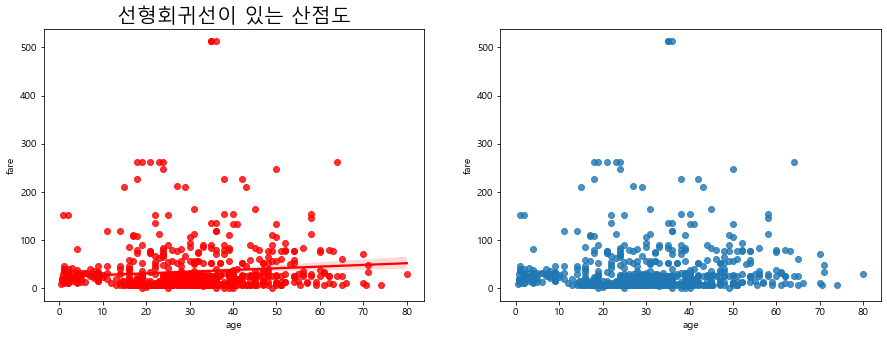

In [4]:
# seaborn을 활용하여 회귀선이 있는 산점도 그리기
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형 회귀선 표시
sns.regplot(x = 'age',  # x축 변수
            y = 'fare', # y축 변수
            data = titanic,  # 데이터
            ax = ax1,
            color = 'red',
            marker = 'o')

sns.regplot(x = 'age',  # x축 변수
            y = 'fare', # y축 변수
            data = titanic,  # 데이터
            ax = ax2,
            fit_reg = False)

ax1.set_title("선형회귀선이 있는 산점도", size = 20)
plt.show()

C:\Users\HPE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


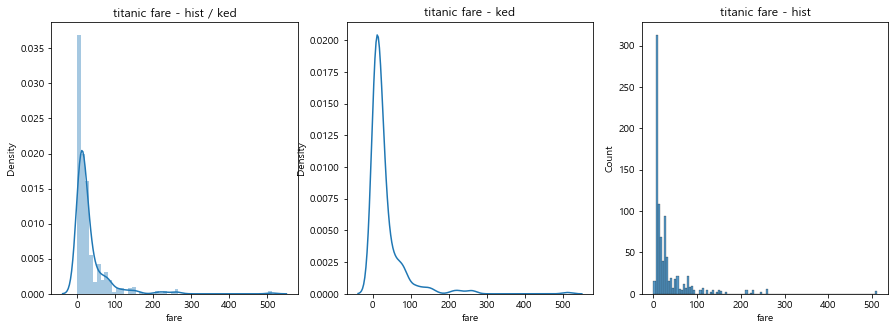

In [5]:
# 히스토그램 / 커널 밀도 함수
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'], ax = ax1)

# kdeplot
sns.kdeplot(x = 'fare', data = titanic, ax = ax2)

# histplot
sns.histplot(x ='fare', data = titanic, ax = ax3)

ax1.set_title('titanic fare - hist / ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

<AxesSubplot:xlabel='class', ylabel='sex'>

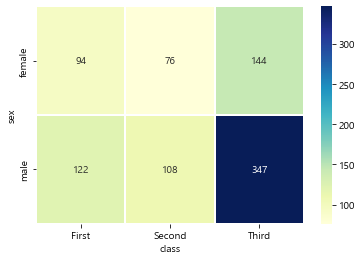

In [6]:
# 히트맵
table = titanic.pivot_table(index = ['sex'], columns = ['class'], aggfunc = 'size')

# 히트맵 그리기
sns.heatmap(table,
            annot = True, fmt = 'd', # 그룹함수의 결과를 정수로 표시
            cmap = 'YlGnBu', # 컬러 맵
            linewidth = .1, # 구분선
            cbar = True      # 컬러바 표시 여부
           )

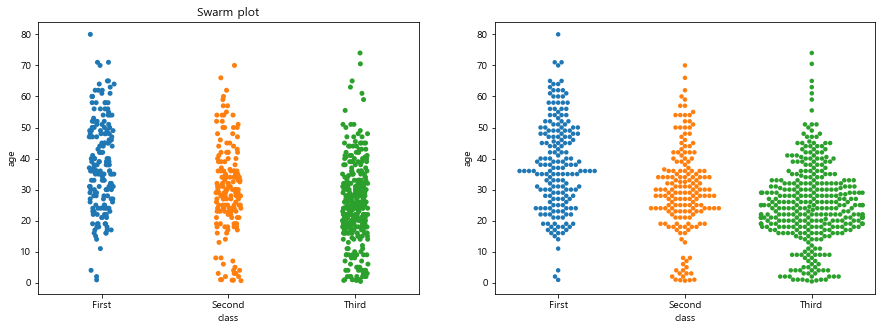

In [7]:
# 범주형 데이터 산점도
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포, 데이터 분산 미고려(중복 표시함)
sns.stripplot(x='class',
             y = 'age',
             data = titanic,
             ax = ax1
             )
sns.swarmplot(x='class',
             y = 'age',
             data = titanic,
             ax = ax2,
              size = 4.5
             )

ax1.set_title('Strip plot')
ax1.set_title('Swarm plot')

plt.show()

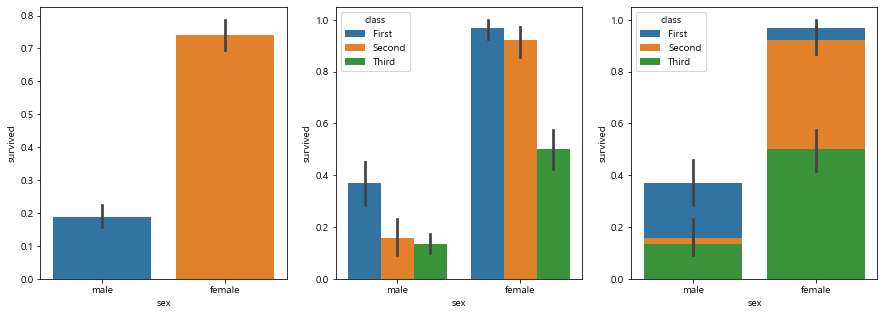

In [8]:
# 막대 그래프 : barplot()
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x = 'sex', y = 'survived', data = titanic, ax = ax1)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic, ax = ax2)
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False,
            data = titanic, ax = ax3)

plt.show()

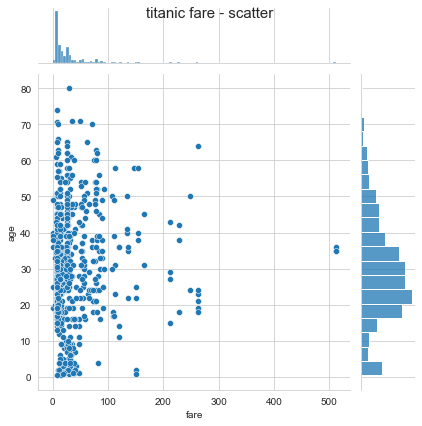

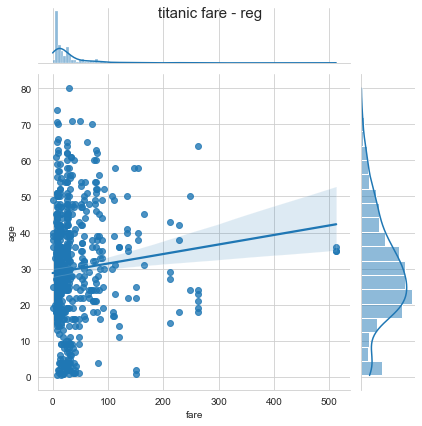

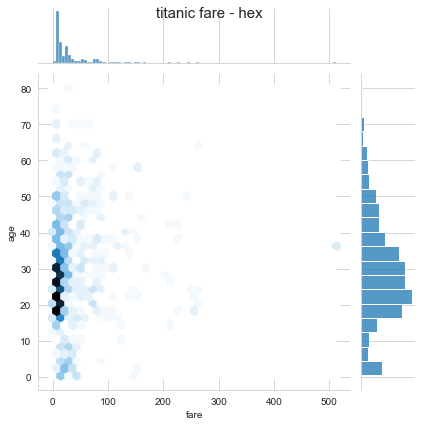

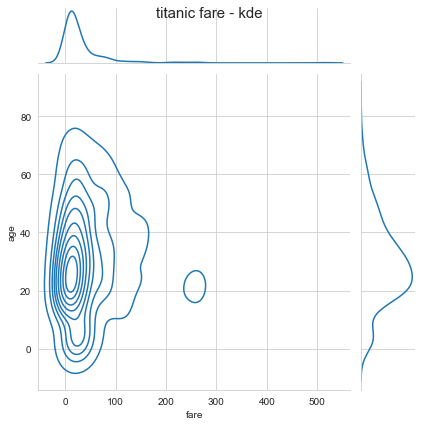

In [9]:
# 조인트 그래프 : jointplot()
# 산점도를 기본, x-y축에 변수에대한 히스토그램
sns.set_style('whitegrid')
j1 = sns.jointplot(x = 'fare', y='age', data = titanic)
j2 = sns.jointplot(x = 'fare', y='age', data = titanic, kind = 'reg')
j3 = sns.jointplot(x = 'fare', y='age', data = titanic, kind = 'hex')
j4 = sns.jointplot(x = 'fare', y='age', data = titanic, kind = 'kde')

j1.fig.suptitle('titanic fare - scatter', size = 15)
j2.fig.suptitle('titanic fare - reg', size = 15)
j3.fig.suptitle('titanic fare - hex', size = 15)
j4.fig.suptitle('titanic fare - kde', size = 15)

plt.show()

## Folium 라이브러리

In [10]:
import folium

seoul_map = folium.Map(location = [37.55, 126.98], zoom_start = 12)

# 지도를 html 파일로 저장
seoul_map.save('./dataset/서울지도.html')

In [11]:
seoul_map1 = folium.Map(location = [37.55, 126.98], zoom_start = 12,
                       tiles = 'stamen Terrain')
seoul_map2 = folium.Map(location = [37.55, 126.98], zoom_start = 12,
                       tiles = 'stamen Toner')

seoul_map1.save('./dataset/서울지도1.html')
seoul_map2.save('./dataset/서울지도2.html')

In [12]:
# 지도에 마커 표시하기
# 위도, 경도로 지도를 생성
# 추가작업 진행

df = pd.read_excel("./dataset/서울지역 대학교 위치.xlsx")
df = df.rename(columns={'Unnamed: 0':'name'})
df = df.set_index('name')
# 대학교 위치정보를 marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup = name).add_to(seoul_map)
    
seoul_map.save('./dataset/서울 대학교 지도.html')

In [56]:
# 지도 영역에 단계구분도 표시 : Choropleth()
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = './dataset/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine= 'openpyxl')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './dataset/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('./gyonggipopulation' + year + '.html')

## 데이터 사전처리

In [ ]:
# 누락 데이터 처리
# --누락 데이터확인
#   - count()
#   - value_counts()
#   - isnull() -> isnull.count()

In [16]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
# deck 칼럼의 값들의 개수 : value_counts()
df['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [30]:
# isnull() : 누락 데이터 개수 확인
print(df.head().isnull().sum(axis = 0))
print()
print(df.isnull().sum(axis = 0))


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [36]:
# 누락 데이터가 n(500)개 이상인 경우 칼럼을 삭제
df1 = df.dropna(axis = 1)    # none이있는 모든 칼럼 삭제

df_1 = df.dropna(axis = 1, thresh = 500)  # none이 500개 이상있는 모든 칼럼 삭제
df_2 = df.dropna(subset = ['deck','age'], how = 'any', axis = 0)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     184 non-null    int64   
 1   pclass       184 non-null    int64   
 2   sex          184 non-null    object  
 3   age          184 non-null    float64 
 4   sibsp        184 non-null    int64   
 5   parch        184 non-null    int64   
 6   fare         184 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        184 non-null    category
 9   who          184 non-null    object  
 10  adult_male   184 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        184 non-null    object  
 14  alone        184 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.4+ KB


In [44]:
# 누락데이터 치환 : df.fillna(method = 'ffill')
#                                      'bfill'
#                                      '값'
df_f = df.copy()
print(df_f.age.isnull().value_counts())
df_f['age'] = df_f['age'].fillna(df['age'].mean(axis = 0))
print()
print(df_f.age.isnull().value_counts())

# 가장 빈번하게 나오는값으로 치환

# 가장 큰값으로 치환, 가장 작은 값으로 치환

# 이전값으로 치환, 이후 나오는 값으로 치환 fillna(method='ffill' or 'bfill')

False    714
True     177
Name: age, dtype: int64

False    891
Name: age, dtype: int64


In [54]:
print(df['embark_town'][825:830])
# embark_town 의 none -> 이전값으로 대체
df_2 = df.copy()
df_2['embark_town'].fillna(method='ffill', inplace = True)
print(df_2['embark_town'][825:830])

# 가장 빈번하게 나오는값으로 치환
most_freq = df['embark_town'].value_counts(dropna = True).idxmax()
df_2 = df.copy()
df_2['embark_town'].fillna(most_freq, inplace = True)
df_2.embark_town[825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
Name: embark_town, dtype: object


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

In [55]:
# 이후 나오는 값으로 치환
print(df['embark_town'][825:831])
df_2 = df.copy()
df_2['embark_town'].fillna(method='bfill', inplace = True)
print(df_2['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829      Cherbourg
830      Cherbourg
Name: embark_town, dtype: object
